In [1]:
import torch
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style("darkgrid")

In [3]:
outputs_finetuned = torch.load("outputs/mnli/mnli_trained.pt").numpy()
outputs_pretrained = torch.load("outputs/mnli/mnli.pt").numpy()

In [4]:
print(outputs_finetuned.shape, outputs_pretrained.shape)

(2141, 768) (2141, 768)


In [5]:
pca = PCA(
    n_components=2,
)

In [6]:
x_pretrained = pca.fit_transform(outputs_pretrained)
x_finetuned = pca.fit_transform(outputs_finetuned)
print(x_pretrained.shape, x_finetuned.shape)

(2141, 2) (2141, 2)


In [9]:
model = ["pretrained"]*outputs_pretrained.shape[0]+["finetuned"]*outputs_finetuned.shape[0]

In [10]:
x = np.vstack((x_pretrained, x_finetuned))
print(x.shape)

(4282, 2)


In [11]:
df = pd.DataFrame(
    data={
        "x_0":x[:, 0],
        "x_1":x[:, 1],
        "model":model,
    }
)

In [12]:
df.shape

(4282, 3)

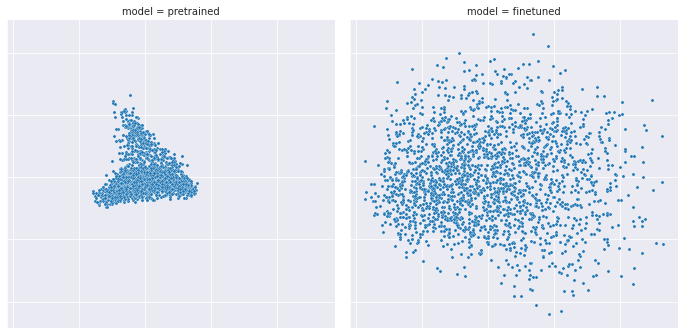

In [17]:
ax = sns.relplot(
    data=df, x="x_0", y="x_1",
    col="model",
    kind="scatter",
    # col="model"
    s=10,
    # color=".1", marker="+"
)
ax.set_xlabels("")
ax.set_ylabels("")

ax.set(xticklabels=[])
ax.set(yticklabels=[])
# plt.title("MNLI")

### SST2 Sentiment

In [4]:
outputs_finetuned = torch.load("outputs/imdb_sst2_sa/sst2_finetuned.pt").numpy()
outputs_pretrained = torch.load("outputs/imdb_sst2_sa/sst2_pretrained.pt").numpy()

In [5]:
print(outputs_finetuned.shape, outputs_pretrained.shape)

(171, 768) (171, 768)


In [6]:
pca = PCA(
    n_components=2,
)

In [8]:
x_pretrained = pca.fit_transform(outputs_pretrained)
x_finetuned = pca.fit_transform(outputs_finetuned)
print(x_pretrained.shape, x_finetuned.shape)

(171, 2) (171, 2)


In [9]:
model = ["pretrained"]*outputs_pretrained.shape[0]+["finetuned"]*outputs_finetuned.shape[0]

In [10]:
x = np.vstack((x_pretrained, x_finetuned))
print(x.shape)

(342, 2)


In [11]:
df = pd.DataFrame(
    data={
        "x_0":x[:, 0],
        "x_1":x[:, 1],
        "model":model,
    }
)

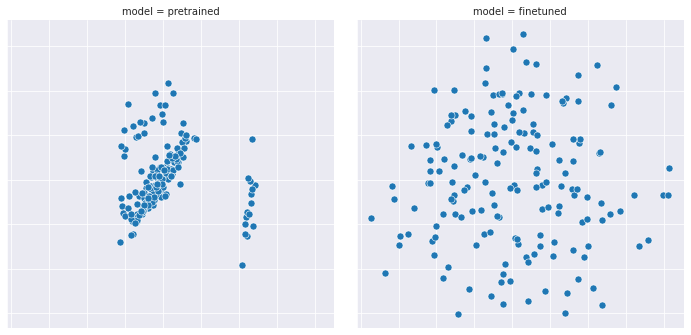

In [15]:
ax = sns.relplot(
    data=df, x="x_0", y="x_1",
    col="model",
    kind="scatter",
    # col="model"
    s=50,
    # color=".1", marker="+"
)
ax.set_xlabels("")
ax.set_ylabels("")

ax.set(xticklabels=[])
ax.set(yticklabels=[])
# plt.title("MNLI")